In [29]:
#word cloud
import wordcloud 
from wordcloud import WordCloud

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [6]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['label'].value_counts()/len(df)*100

0    86.593683
1    13.406317
Name: label, dtype: float64

In [8]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

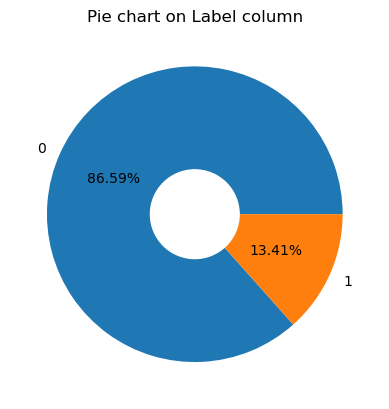

In [9]:
plt.pie(df['label'].value_counts(), labels = df['label'].value_counts().index,autopct='%.2f%%')
c = plt.Circle((0,0), radius = 0.3, color = 'White')
plt.title('Pie chart on Label column')
plt.gcf()
plt.gca().add_artist(c)
plt.show()

# All words into Lower Case

In [16]:
df['message'] = df['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['message'].head()

0    go until jurong point, crazy.. available only ...
1                          ok lar... joking wif oni...
2    free entry in a wkly comp to win fa cup final ...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: message, dtype: object

# Commonly used words

In [17]:
common_words = pd.Series(' '.join(df['message']).split()).value_counts()[:50]
common_words

to           2226
you          1917
i            1466
a            1419
the          1317
and           967
is            862
in            855
my            751
for           697
your          676
of            613
me            605
have          568
call          557
on            520
are           485
that          468
so            423
but           420
or            414
not           404
at            398
can           385
if            378
i'm           377
with          377
get           375
be            375
will          374
do            365
just          363
we            345
this          312
u             299
when          282
from          277
&lt;#&gt;     276
up            262
go            262
all           259
no            257
how           253
what          250
now           247
.             235
like          234
got           234
know          230
was           230
dtype: int64

# Remove some of the Words

In [18]:
word_removal=['i','u','2','im','ur','4','ltgt','it','ü','r','n']

In [19]:
df['message']= df['message'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
df['message'].head()

0    go until jurong point, crazy.. available only ...
1                          ok lar... joking wif oni...
2    free entry in a wkly comp to win fa cup final ...
3        dun say so early hor... c already then say...
4    nah don't think he goes to usf, he lives aroun...
Name: message, dtype: object

# Low Frequently used words

In [20]:
Not_frequent = pd.Series(' '.join(df['message']).split()).value_counts()[-50:]
Not_frequent

thuglyfe           1
falconerf          1
railway.           1
clarification      1
individual.time    1
no..he             1
*possessive        1
owned              1
screamed           1
bus?               1
08712402902        1
faded              1
buddys.            1
choose.            1
restrictions,      1
glory,             1
sorts              1
affectionate       1
expired            1
re-sub             1
monoc              1
monos              1
heal               1
upgrdcentre        1
9153.              1
july.              1
oral.              1
position.          1
roads              1
slippery           1
bike?              1
language.          1
okmail:            1
screamed,          1
enters             1
removed.           1
differ             1
transcribing.      1
census.            1
ethnicity          1
differ.be          1
categories         1
opinions           1
sheffield          1
nice!              1
0871212025016      1
stream             1
cos...       

In [21]:
word_removal=['lololo','aaooooright','intha','ponnungale']

In [22]:
df['message'] = df['message'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
df['message'].head()

0    go until jurong point, crazy.. available only ...
1                          ok lar... joking wif oni...
2    free entry in a wkly comp to win fa cup final ...
3        dun say so early hor... c already then say...
4    nah don't think he goes to usf, he lives aroun...
Name: message, dtype: object

# Lemmatization

In [24]:
wordnet = WordNetLemmatizer()
lem_message=df['message'].apply(lambda x: " ".join([wordnet.lemmatize(i) for i in x.split()]))

In [25]:
df_lem = pd.DataFrame({'label': df['label'] , 'message': lem_message})
df_lem.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif oni...
2,1,free entry in a wkly comp to win fa cup final ...
3,0,dun say so early hor... c already then say...
4,0,"nah don't think he go to usf, he life around h..."


In [33]:
#forming lemmatize cloud words 

positives=df_lem[(df_lem['label']==0)]
p_words = ' '.join(positives['message'])
p_words

'go until jurong point, crazy.. available only in bugis great world la e buffet... cine there got amore wat... ok lar... joking wif oni... dun say so early hor... c already then say... nah don\'t think he go to usf, he life around here though even my brother is not like to speak with me. they treat me like aid patent. a per your request \'melle melle (oru minnaminunginte nurungu vettam)\' ha been set a your callertune for all callers. press *9 to copy your friend callertune i\'m gonna be home soon and don\'t want to talk about this stuff anymore tonight, k? i\'ve cried enough today. i\'ve been searching for the right word to thank you for this breather. promise wont take your help for granted and will fulfil my promise. you have been wonderful and a blessing at all times. have a date on sunday with will!! oh k...i\'m watching here:) eh remember how spell his name... yes did. he v naughty make until v wet. fine if thatåõs the way feel. thatåõs the way it gota b is that seriously how you

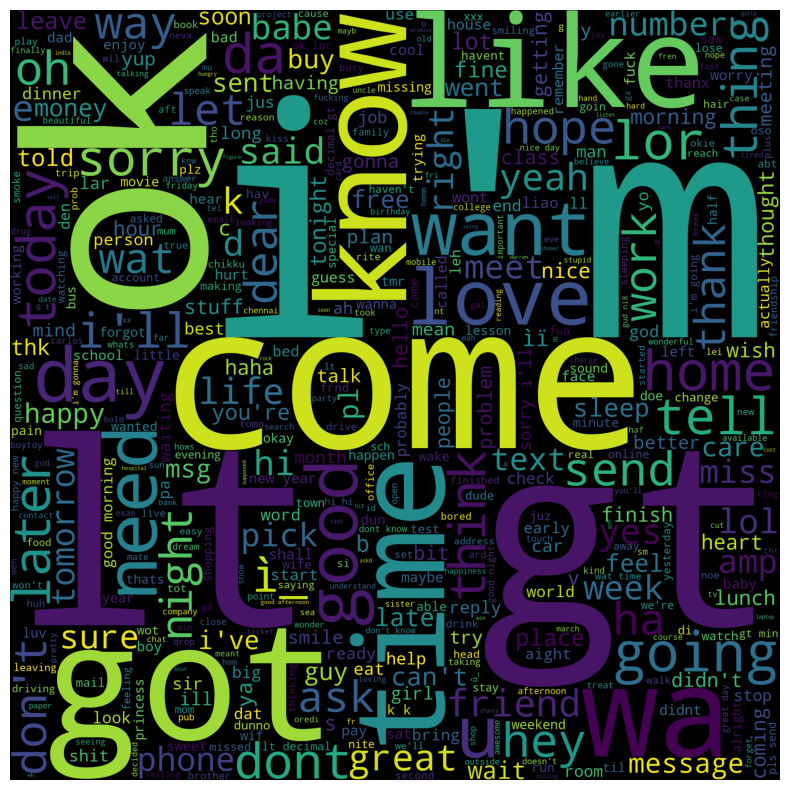

In [34]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      width=2000,
                      height=2000,max_words=500
                     ).generate(p_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
negatives=df_lem[(df_lem['label']==1)]
n_words = ' '.join(negatives['message'])
n_words

'free entry in a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for still? tb ok! xxx std chgs to send, å£1.50 to rcv winner!! a a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hour only. had your mobile 11 month or more? entitled to update to the latest colour mobile with camera for free! call the mobile update co free on 08002986030 six chance to win cash! from 100 to 20,000 pound txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl info urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>>

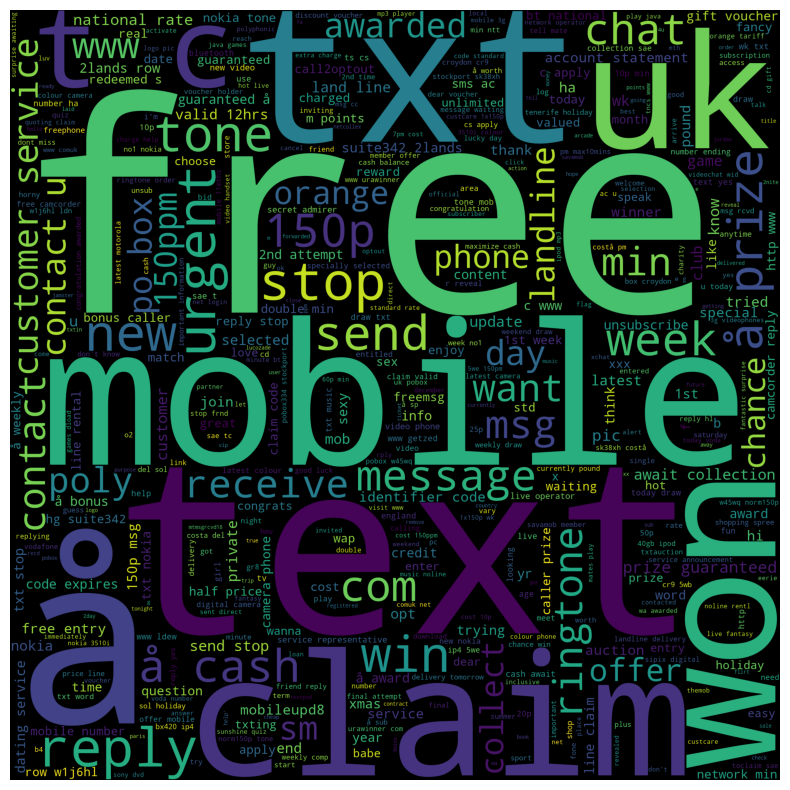

In [35]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      width=2000,
                      height=2000,max_words=500
                     ).generate(n_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Train test split for Lemmatized data set.

In [37]:


x = df_lem['message']
y = df_lem['label']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Enginnering
Planned to do 2 Vectorization techniques:
1. Count Vectorization
2. TF-IDF

In [43]:
%%time
count_vector = CountVectorizer(stop_words='english',min_df=3)
xtrain_cvec = count_vector.fit_transform(xtrain)
count_vector.get_feature_names_out()

Wall time: 111 ms


array(['00', '000', '02', ..., 'ìï', 'û_', 'ûò'], dtype=object)

In [44]:
xtrain_cvec_df=pd.DataFrame(xtrain_cvec.toarray(),columns=count_vector.get_feature_names_out())
xtrain_cvec_df.head()

,00,000,02,0207,03,04,06,0800,08000839402,08000930705,...,yoga,yr,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
xtest_cvec = count_vector.transform(xtest)
xtest_cvec_df=pd.DataFrame(xtest_cvec.toarray(),columns=count_vector.get_feature_names_out())
xtest_cvec_df.head()

,00,000,02,0207,03,04,06,0800,08000839402,08000930705,...,yoga,yr,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
xtrain_tf = tfidf_vector.fit_transform(xtrain)
xtrain_tf_df=pd.DataFrame(xtrain_tf.toarray(),columns=tfidf_vector.get_feature_names_out())
xtrain_tf_df.head()

,00,000,02,0207,03,04,06,0800,08000839402,08000930705,...,yoga,yr,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
xtest_tf = tfidf_vector.transform(xtest)
xtest_tf_df=pd.DataFrame(xtest_tf.toarray(),columns=tfidf_vector.get_feature_names_out())
xtest_tf_df.head()

,00,000,02,0207,03,04,06,0800,08000839402,08000930705,...,yoga,yr,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Creating a data frame for the interpretation with all the models together.
performance_df = pd.DataFrame(columns=['Model_name', 'Accurarcy_train', 'Accuracy_test', 'Precision_score_train',
                                       'Precision_score_test','Recall_train','Recall_test',
                                       'F1score_train','F1Score_test','Remark'])
# a common method for model buidling.
def model_build(model, Name):
    global performance_df

    if ('lstm' in Name.lower() or 'rnn' in Name.lower() ):
        prediction_train = model.predict(xtrain)
        ypred_train=[0 if i<0.5 else 1       for i in prediction_train]
    
        prediction_test = model.predict(xtest)
        ypred_test=[0 if i<0.5 else 1       for i in prediction_test]

        Accurarcy_train       = accuracy_score(ytrain,ypred_train)
        Accuracy_test         = accuracy_score(ytest,ypred_test)
        Precision_score_train = precision_score(ytrain,ypred_train)
        Precision_score_test  = precision_score(ytest,ypred_test)
        Recall_train          = recall_score(ytrain,ypred_train)
        Recall_test           = recall_score(ytest,ypred_test)
    
        F1score_train = f1_score(ytrain,ypred_train)
        F1Score_test  = f1_score(ytest,ypred_test)

    else:
    
        ypred_train  = model.predict(xtrain)
        ypred_test   = model.predict(xtest)
        ytest_prob   = model.predict_proba(xtest)[:,1]
    
        Accurarcy_train       = accuracy_score(ytrain,ypred_train)
        Accuracy_test         = accuracy_score(ytest,ypred_test)
        Precision_score_train = precision_score(ytrain,ypred_train)
        Precision_score_test  = precision_score(ytest,ypred_test)
        Recall_train          = recall_score(ytrain,ypred_train)
        Recall_test           = recall_score(ytest,ypred_test)
    
        F1score_train = f1_score(ytrain,ypred_train)
        F1Score_test  = f1_score(ytest,ypred_test)

    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 0.02 or train_acc > 0.95:
            return 'Over Fit'
        elif train_acc < 0.8 or test_acc < 0.8:
            return 'Under Fit'
        else:
            return 'Good Fit'
    
    performance_df = performance_df.append({'Model_name' : Name, 'Accurarcy_train' : Accurarcy_train,
                                            'Accuracy_test': Accuracy_test, 'Precision_score_train' : Precision_score_train,
                                            'Precision_score_test' : Precision_score_test, 'Recall_train' : Recall_train,
                                            'Recall_test' : Recall_test, 'F1score_train' : F1score_train,
                                            'F1Score_test' : F1Score_test, 'Remark' : remark(Accurarcy_train, Accuracy_test) }, ignore_index=True)

    print('Train Classifcation Report in  {}'.format(Name),'\n',classification_report(ytrain,ypred_train))
    print('***********')
    print('Test Classifcation Report in {} '.format(Name),'\n',classification_report(ytest,ypred_test))

    if ('lstm' in Name.lower() or 'rnn'  in Name.lower() ):
        print('---')
        
    else:
        
        # Visualization of the ROC curve.
        fpr,tpr,thershold=roc_curve(ytest,ytest_prob)
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC-AUC Curve of {}'.format(Name))
        plt.text(x = 0.4, y = 0.3, s = ('ROC_AUC_Score:', round(roc_auc_score(ytest,ypred_test), 4))) 
        plt.show()
    
    # Confusion Matrix for train and test.
    cm = confusion_matrix(ytrain,ypred_train)
    print('Confusion Matrix for Train')
    ConfusionMatrixDisplay(cm).plot()
    plt.grid(False)
    plt.show()

    cm1 = confusion_matrix(ytest,ypred_test)
    print('Confusion Matrix for Test')
    ConfusionMatrixDisplay(cm1).plot()
    plt.grid(False)
    plt.show()

In [51]:
# Assinging these values on behalf of running model_build function with Lemmatized data with Count Vector.

xtrain = xtrain_cvec
xtest  = xtest_cvec

In [52]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3900, 1925)
(1672, 1925)
(3900,)
(1672,)


# Building Models for Lemmatized data with Count Vectorizer

Train Classifcation Report in  DecisionTreeClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

***********
Test Classifcation Report in DecisionTreeClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1453
           1       0.91      0.87      0.89       219

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



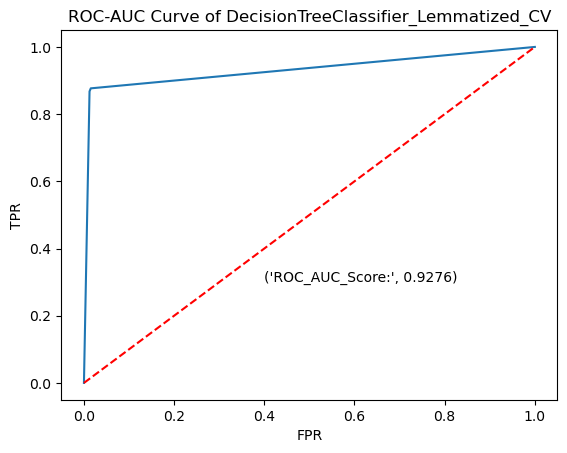

Confusion Matrix for Train


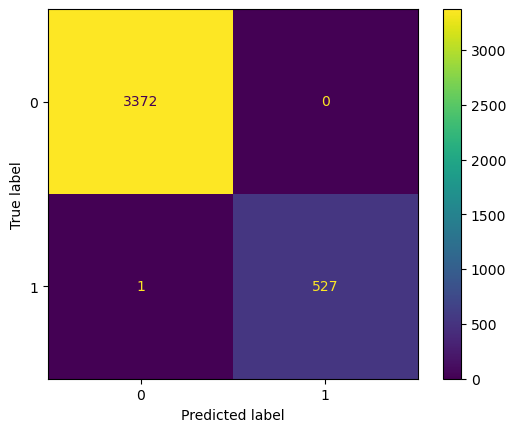

Confusion Matrix for Test


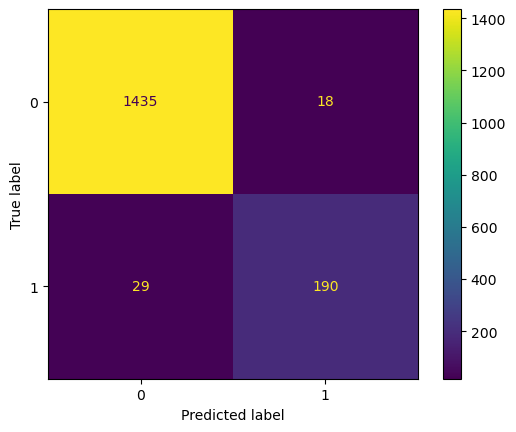

In [53]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
model_build(model_dt,'DecisionTreeClassifier_Lemmatized_CV')

Train Classifcation Report in  RandomForestClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

***********
Test Classifcation Report in RandomForestClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



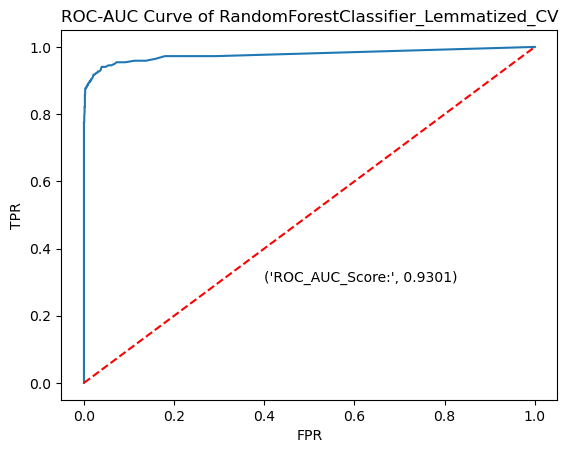

Confusion Matrix for Train


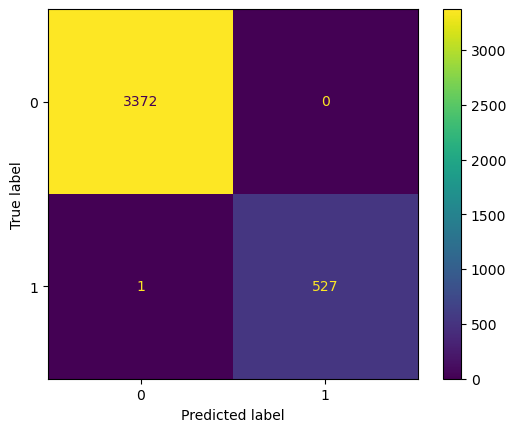

Confusion Matrix for Test


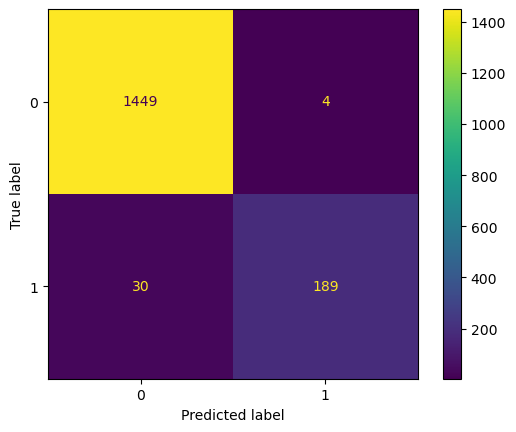

In [54]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
model_build(model_rf,'RandomForestClassifier_Lemmatized_CV')

Train Classifcation Report in  MultinomialNB_Lemmatized_CV 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3372
           1       0.96      0.97      0.96       528

    accuracy                           0.99      3900
   macro avg       0.98      0.98      0.98      3900
weighted avg       0.99      0.99      0.99      3900

***********
Test Classifcation Report in MultinomialNB_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.93      0.91      0.92       219

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



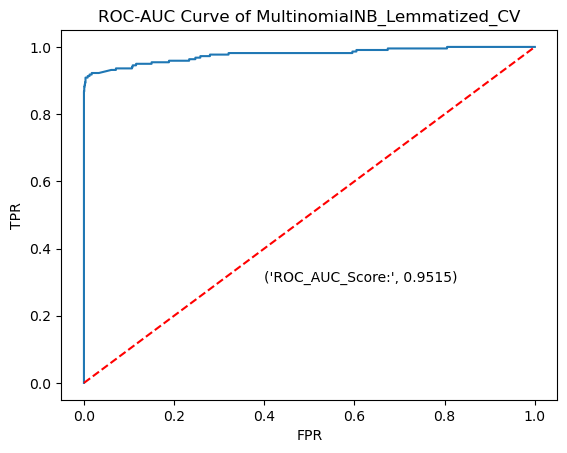

Confusion Matrix for Train


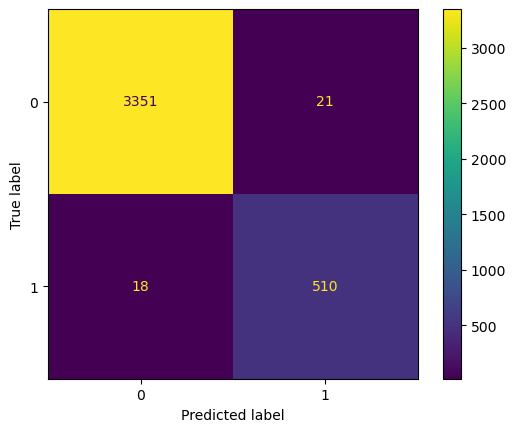

Confusion Matrix for Test


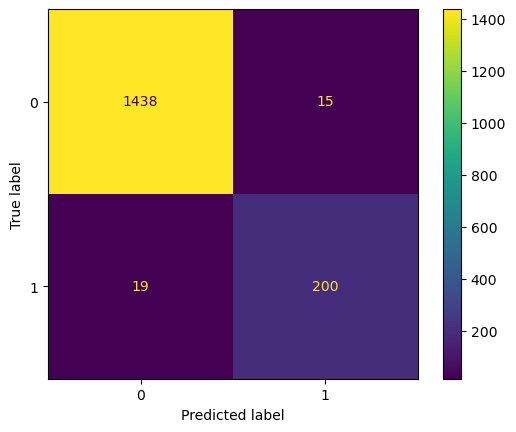

In [55]:
mnb = MultinomialNB()
model_mnb = mnb.fit(xtrain, ytrain)
model_build(model_mnb,'MultinomialNB_Lemmatized_CV')

Train Classifcation Report in  AdaBoostClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3372
           1       0.97      0.86      0.91       528

    accuracy                           0.98      3900
   macro avg       0.97      0.93      0.95      3900
weighted avg       0.98      0.98      0.98      3900

***********
Test Classifcation Report in AdaBoostClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1453
           1       0.96      0.81      0.88       219

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



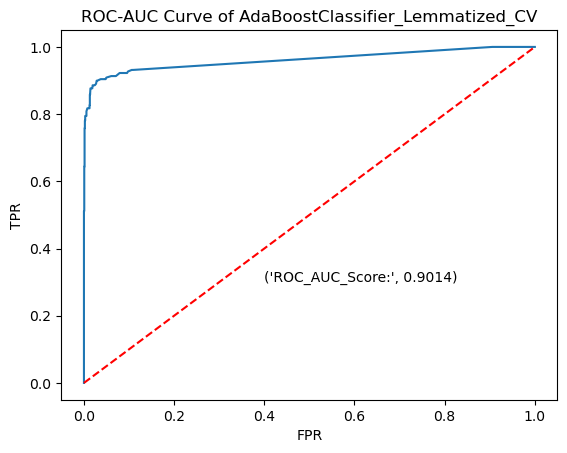

Confusion Matrix for Train


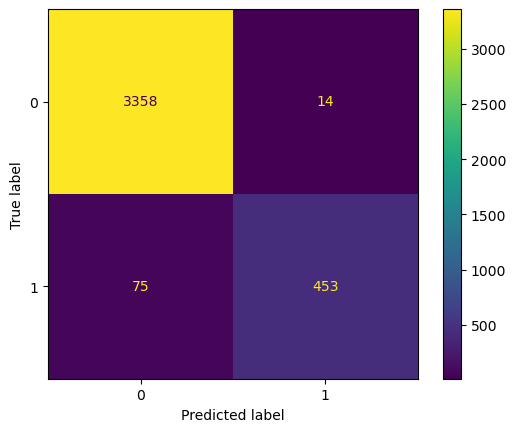

Confusion Matrix for Test


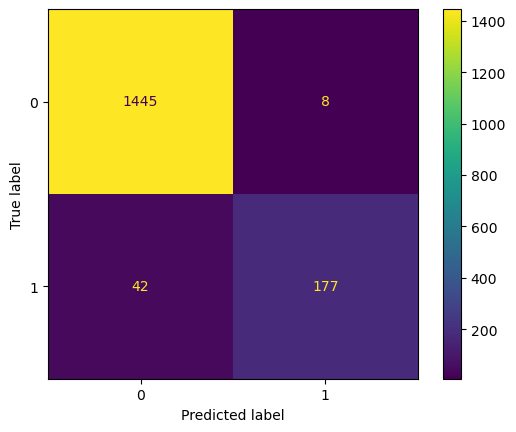

In [56]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
model_build(model_ada,'AdaBoostClassifier_Lemmatized_CV')

Train Classifcation Report in  GradientBoostingClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3372
           1       1.00      0.83      0.90       528

    accuracy                           0.98      3900
   macro avg       0.99      0.91      0.95      3900
weighted avg       0.98      0.98      0.98      3900

***********
Test Classifcation Report in GradientBoostingClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.98      0.71      0.82       219

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



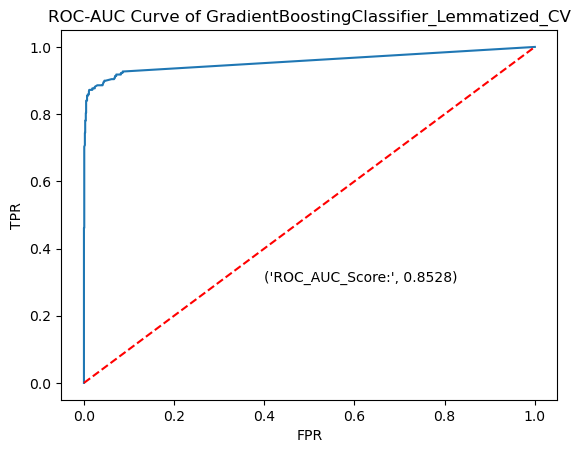

Confusion Matrix for Train


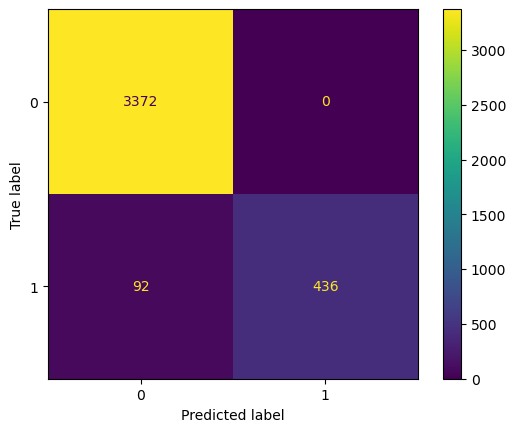

Confusion Matrix for Test


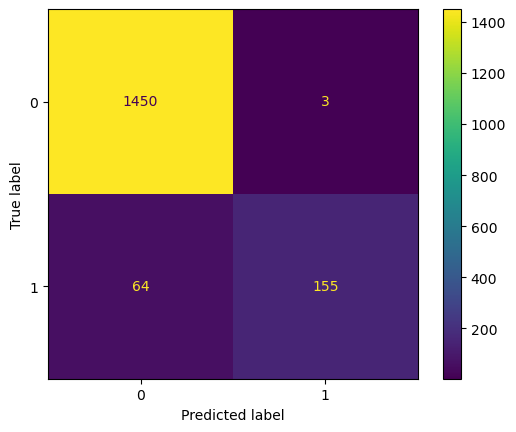

In [57]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(xtrain,ytrain)
model_build(model_gbc,'GradientBoostingClassifier_Lemmatized_CV')

Train Classifcation Report in  XGBClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3372
           1       1.00      0.92      0.96       528

    accuracy                           0.99      3900
   macro avg       0.99      0.96      0.98      3900
weighted avg       0.99      0.99      0.99      3900

***********
Test Classifcation Report in XGBClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.97      0.84      0.90       219

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



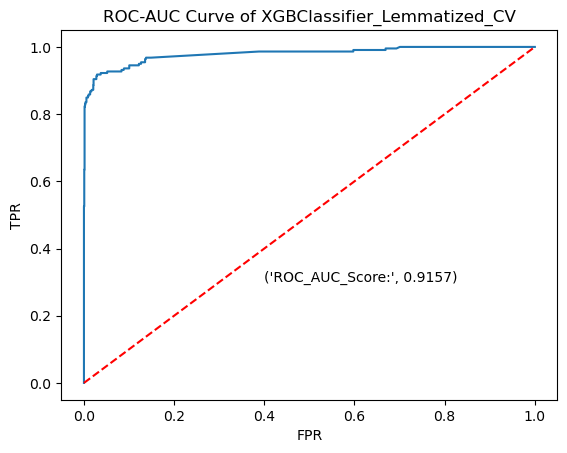

Confusion Matrix for Train


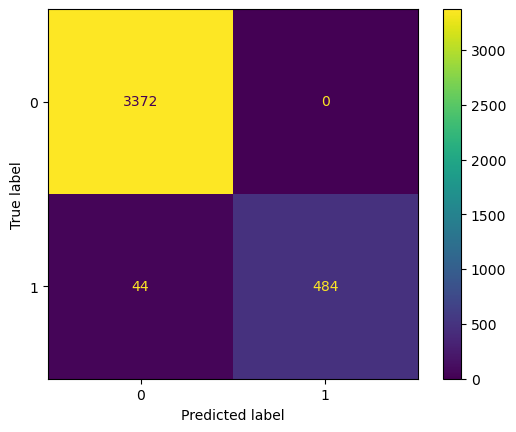

Confusion Matrix for Test


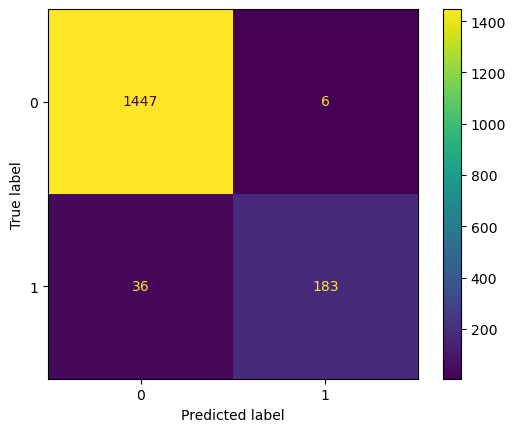

In [58]:
xgb = XGBClassifier()
model_xgb = xgb.fit(xtrain,ytrain)
model_build(model_xgb,'XGBClassifier_Lemmatized_CV')

Train Classifcation Report in  KnnClassifier_Lemmatized_CV 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      3372
           1       1.00      0.50      0.67       528

    accuracy                           0.93      3900
   macro avg       0.96      0.75      0.81      3900
weighted avg       0.94      0.93      0.92      3900

***********
Test Classifcation Report in KnnClassifier_Lemmatized_CV  
               precision    recall  f1-score   support

           0       0.91      1.00      0.96      1453
           1       1.00      0.38      0.55       219

    accuracy                           0.92      1672
   macro avg       0.96      0.69      0.76      1672
weighted avg       0.93      0.92      0.90      1672



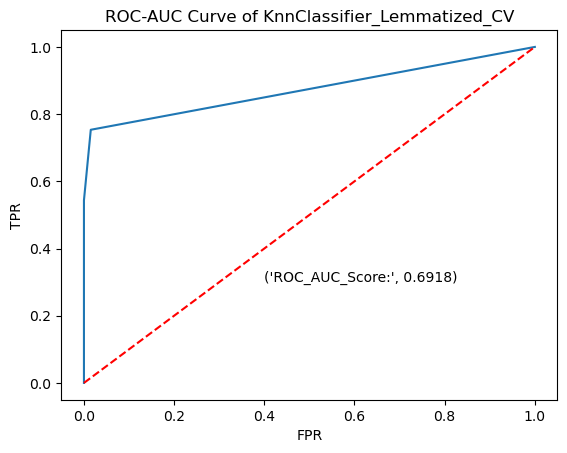

Confusion Matrix for Train


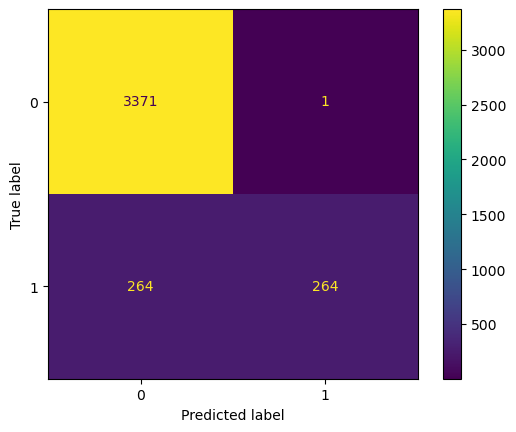

Confusion Matrix for Test


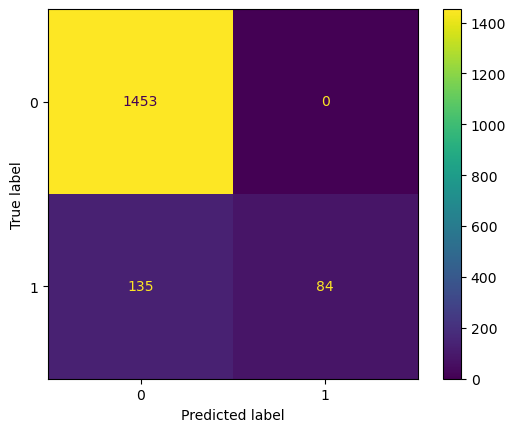

In [61]:
knn =KNeighborsClassifier()
model_knn = knn.fit(xtrain,ytrain)
model_build(model_knn,'KnnClassifier_Lemmatized_CV')

# TF-IDF

In [62]:
# Assinging these values on behalf of running model_build function with Lemmatized data with TF-IDF.

xtrain = xtrain_tf
xtest  = xtest_tf

# Building Models for Lemmatized data with TF-IDF

Train Classifcation Report in  DecisionTreeClassifier_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

***********
Test Classifcation Report in DecisionTreeClassifier_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1453
           1       0.89      0.84      0.87       219

    accuracy                           0.97      1672
   macro avg       0.94      0.91      0.92      1672
weighted avg       0.97      0.97      0.97      1672



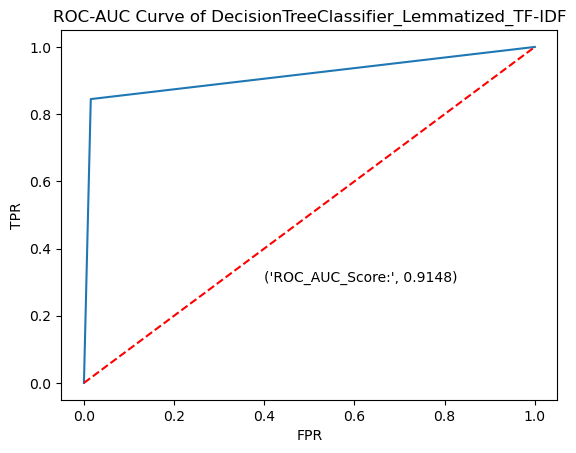

Confusion Matrix for Train


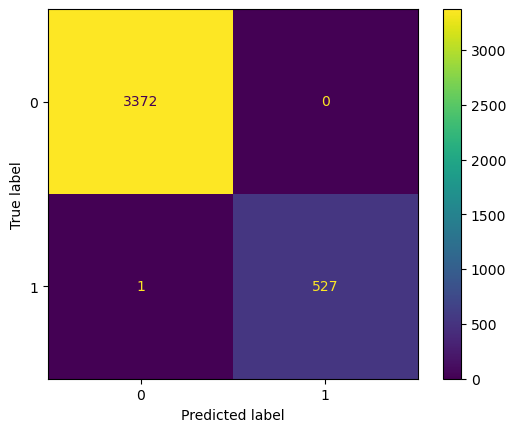

Confusion Matrix for Test


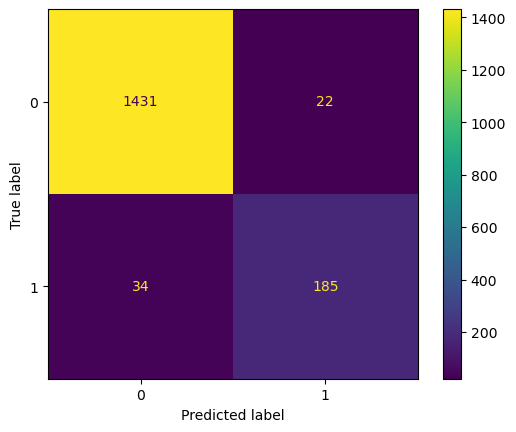

In [63]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
model_build(model_dt,'DecisionTreeClassifier_Lemmatized_TF-IDF')

Train Classifcation Report in  RandomForestClassifier_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

***********
Test Classifcation Report in RandomForestClassifier_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



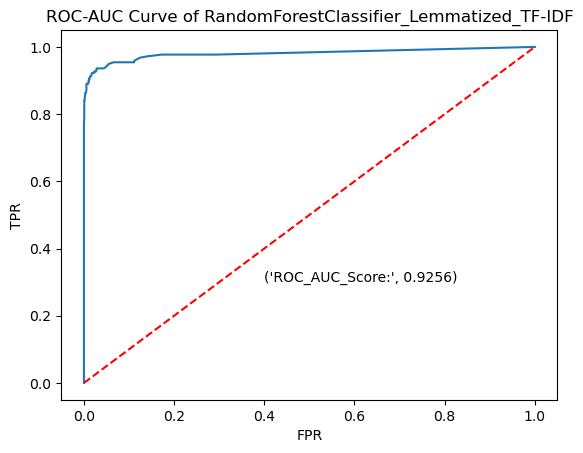

Confusion Matrix for Train


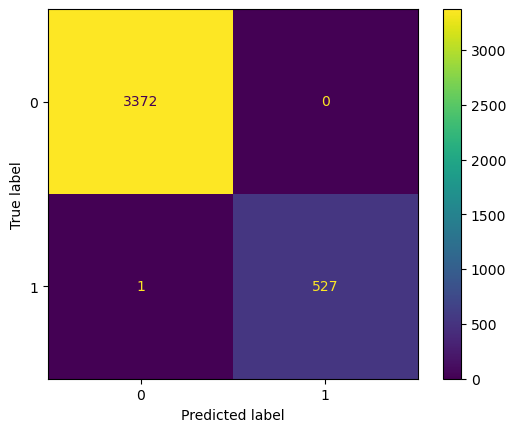

Confusion Matrix for Test


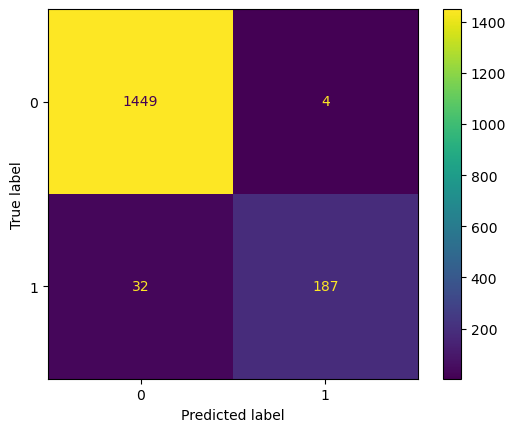

In [64]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
model_build(model_rf,'RandomForestClassifier_Lemmatized_TF-IDF')

Train Classifcation Report in  MultinomialNB_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3372
           1       1.00      0.91      0.95       528

    accuracy                           0.99      3900
   macro avg       0.99      0.96      0.97      3900
weighted avg       0.99      0.99      0.99      3900

***********
Test Classifcation Report in MultinomialNB_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



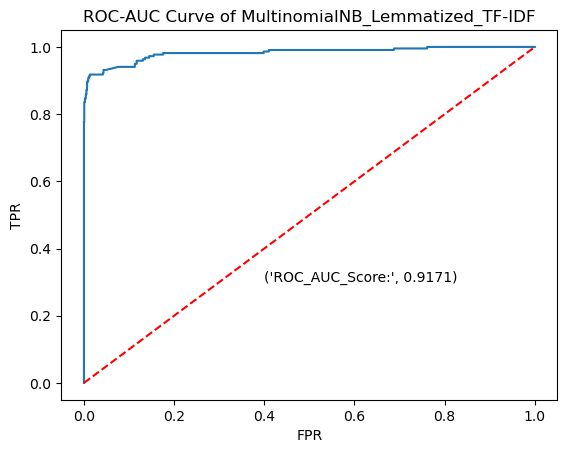

Confusion Matrix for Train


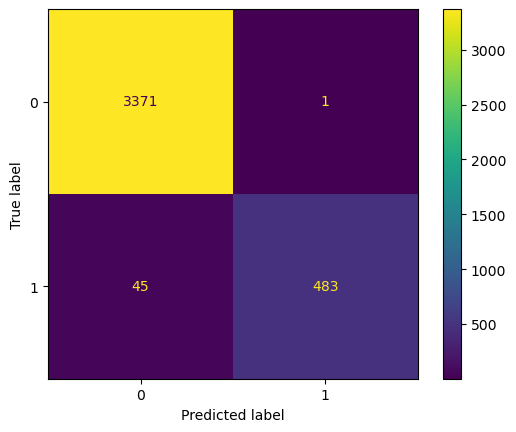

Confusion Matrix for Test


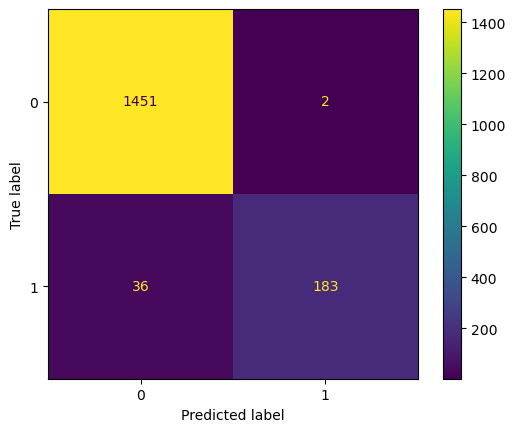

In [65]:
mnb = MultinomialNB()
model_mnb = mnb.fit(xtrain, ytrain)
model_build(model_mnb,'MultinomialNB_Lemmatized_TF-IDF')

Train Classifcation Report in  AdaBoostClassifier_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3372
           1       0.98      0.86      0.92       528

    accuracy                           0.98      3900
   macro avg       0.98      0.93      0.95      3900
weighted avg       0.98      0.98      0.98      3900

***********
Test Classifcation Report in AdaBoostClassifier_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1453
           1       0.96      0.79      0.87       219

    accuracy                           0.97      1672
   macro avg       0.97      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



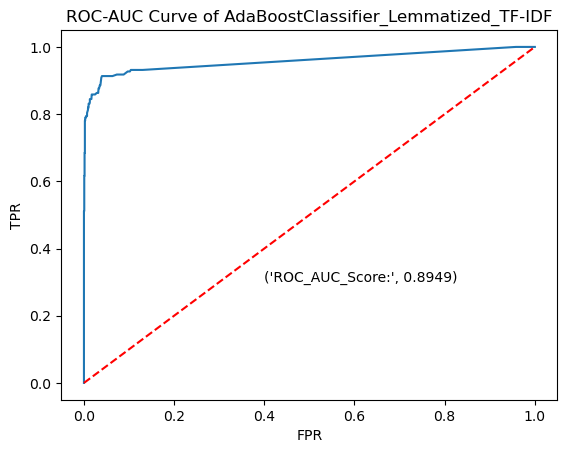

Confusion Matrix for Train


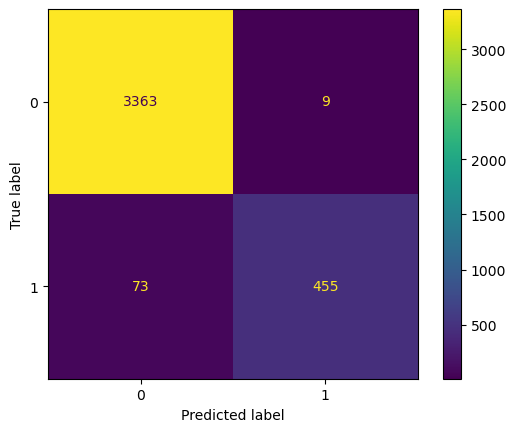

Confusion Matrix for Test


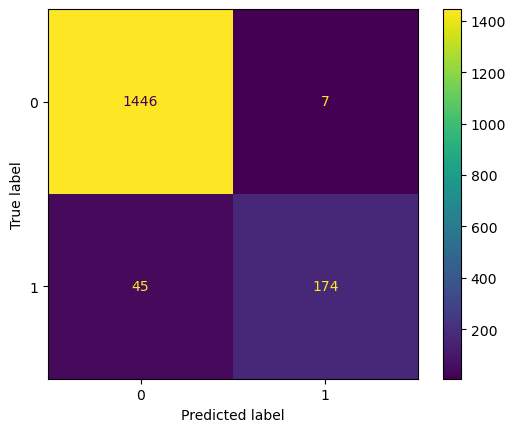

In [66]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
model_build(model_ada,'AdaBoostClassifier_Lemmatized_TF-IDF')

Train Classifcation Report in  GradientBoostingClassifier_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3372
           1       1.00      0.83      0.91       528

    accuracy                           0.98      3900
   macro avg       0.99      0.92      0.95      3900
weighted avg       0.98      0.98      0.98      3900

***********
Test Classifcation Report in GradientBoostingClassifier_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.98      0.70      0.82       219

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



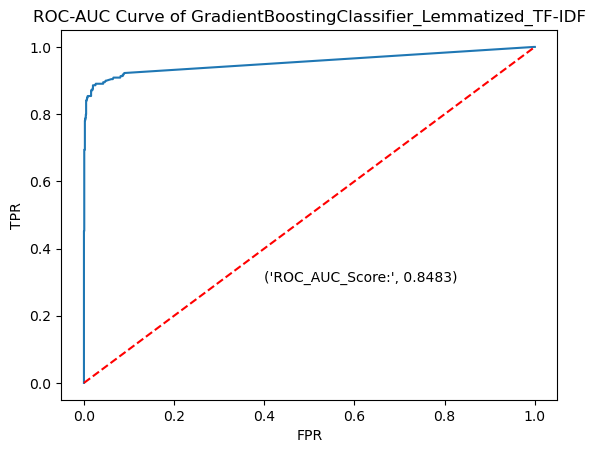

Confusion Matrix for Train


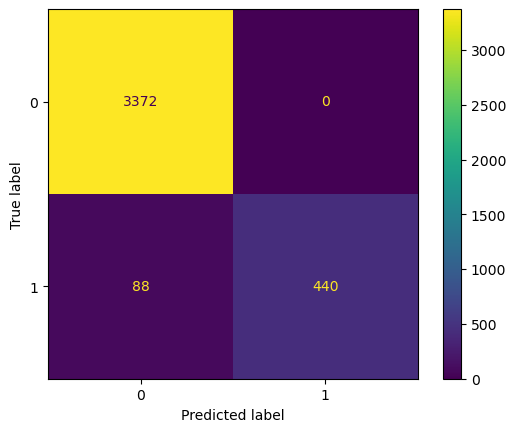

Confusion Matrix for Test


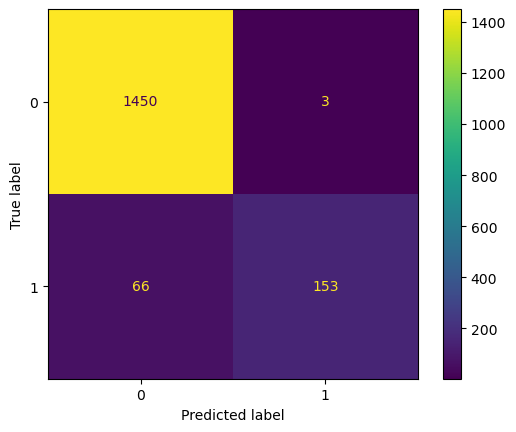

In [67]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(xtrain,ytrain)
model_build(model_gbc,'GradientBoostingClassifier_Lemmatized_TF-IDF')

Train Classifcation Report in  XGBClassifier_Lemmatized_TF-IDF 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3372
           1       1.00      0.94      0.97       528

    accuracy                           0.99      3900
   macro avg       0.99      0.97      0.98      3900
weighted avg       0.99      0.99      0.99      3900

***********
Test Classifcation Report in XGBClassifier_Lemmatized_TF-IDF  
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1453
           1       0.96      0.84      0.89       219

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



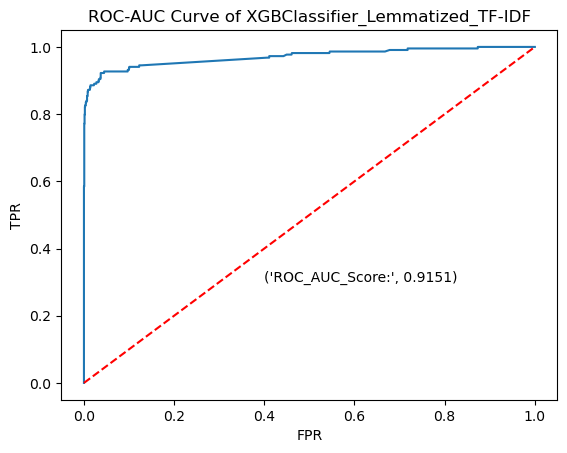

Confusion Matrix for Train


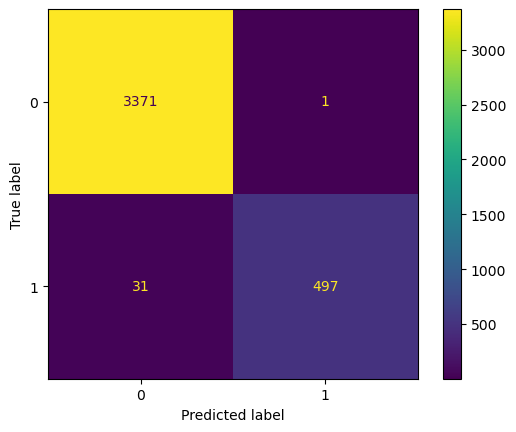

Confusion Matrix for Test


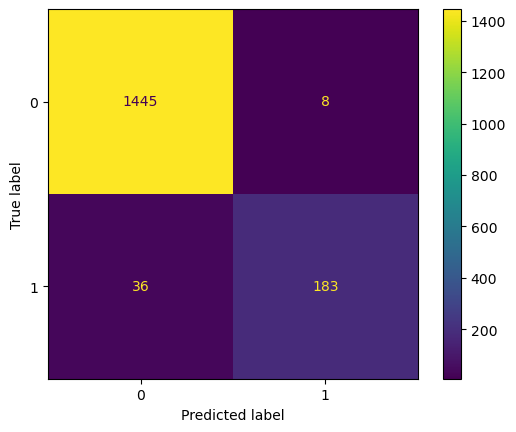

In [68]:
xgb = XGBClassifier()
model_xgb = xgb.fit(xtrain,ytrain)
model_build(model_xgb,'XGBClassifier_Lemmatized_TF-IDF')

In [72]:
performance_df

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
0,DecisionTreeClassifier_Lemmatized_CV,0.999744,0.971890,1.000000,0.913462,0.998106,0.867580,0.999052,0.889930,Over Fit
1,RandomForestClassifier_Lemmatized_CV,0.999744,0.979665,1.000000,0.979275,0.998106,0.863014,0.999052,0.917476,Over Fit
2,MultinomialNB_Lemmatized_CV,0.990000,0.979665,0.960452,0.930233,0.965909,0.913242,0.963173,0.921659,Over Fit
3,AdaBoostClassifier_Lemmatized_CV,0.977179,0.970096,0.970021,0.956757,0.857955,0.808219,0.910553,0.876238,Over Fit
4,GradientBoostingClassifier_Lemmatized_CV,0.976410,0.959928,1.000000,0.981013,0.825758,0.707763,0.904564,0.822281,Over Fit
5,XGBClassifier_Lemmatized_CV,0.988718,0.974880,1.000000,0.968254,0.916667,0.835616,0.956522,0.897059,Over Fit
6,KnnClassifier_Lemmatized_CV,0.932051,0.919258,0.996226,1.000000,0.500000,0.383562,0.665826,0.554455,Good Fit
7,DecisionTreeClassifier_Lemmatized_TF-IDF,0.999744,0.966507,1.000000,0.893720,0.998106,0.844749,0.999052,0.868545,Over Fit
8,RandomForestClassifier_Lemmatized_TF-IDF,0.999744,0.978469,1.000000,0.979058,0.998106,0.853881,0.999052,0.912195,Over Fit
9,MultinomialNB_Lemmatized_TF-IDF,0.988205,0.977273,0.997934,0.989189,0.914773,0.835616,0.954545,0.905941,Over Fit


In [73]:
performance_df[performance_df['Remark'] == 'Good Fit']

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
6,KnnClassifier_Lemmatized_CV,0.932051,0.919258,0.996226,1.0,0.5,0.383562,0.665826,0.554455,Good Fit
